## FIRST MACHINE LEARNING PROGRAM

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## 1. The dataset

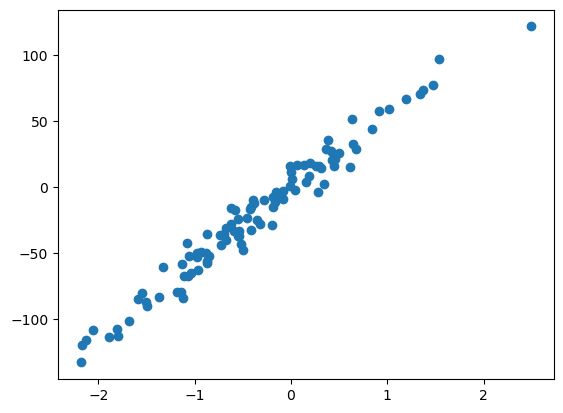

In [49]:
x,y = make_regression(n_samples = 100, n_features = 1, noise = 10)
plt.scatter(x,y)

In [50]:
# verify the shape of our data
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [51]:
#reshape the data which doesn't correspond to what we want
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [52]:
# Write the X matrix
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


In [53]:
# Write the O matrix
theta = np.random.randn(2,1)
print(theta.shape)
print(theta)

(2, 1)
[[0.26764515]
 [0.59298801]]


## 2. The model

In [54]:
def model(X, theta):
    return(X.dot(theta))

In [56]:
print(model(X,theta).shape)
print(model(X,theta)[0:3])

(100, 1)
[[0.1423221 ]
 [0.3142273 ]
 [0.29227754]]


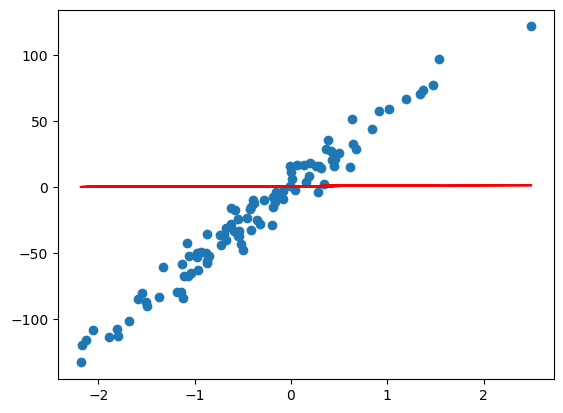

In [57]:
# plot the model and the target
plt.scatter(x,y)
plt.plot(x, model(X, theta), c='r')

## 3. The cost function

In [58]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m)*np.sum((model(X, theta) - y)**2)

In [59]:
print(cost_function(X,y,theta))

1497.652806432128


## 4. The gradient descent algorithm

In [72]:
# The gradient function
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [86]:
# The gradient descent algorithm
def gradient_descent(X,y,theta, learning_rate, nb_iteration):
    cost_hist = np.zeros(nb_iteration)
    for i in range(0, nb_iteration):
        theta = theta - learning_rate*grad(X,y,theta)
        cost_hist[i] = cost_function(X,y,theta)
    return theta, cost_hist

## 5. Machine learning !

In [87]:
# The machine find the right value of the model's parameters
theta_final,cost_hist = gradient_descent(X,y,theta, learning_rate = 0.001, nb_iteration = 1000)

In [88]:
theta_final

array([[32.55907665],
       [-8.1333557 ]])

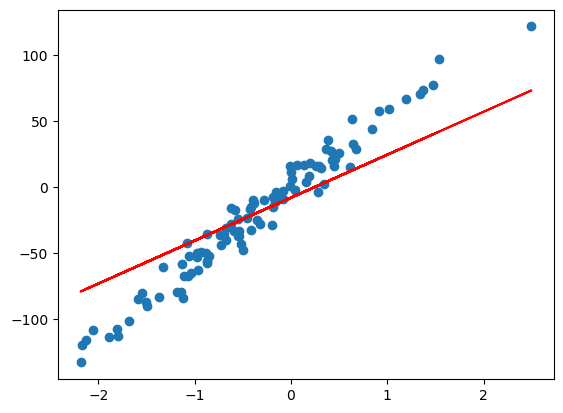

In [89]:
# Verifications
prediction = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, prediction, c='r')

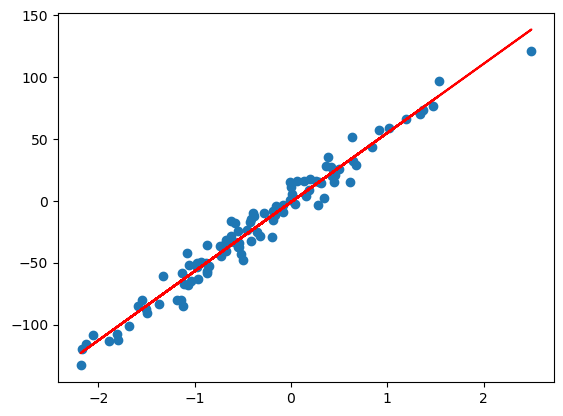

In [95]:
# Modify the learning rate
theta_final,cost_hist = gradient_descent(X,y,theta, learning_rate = 0.01, nb_iteration = 1000)
prediction = model(X, theta_final)
plt.scatter(x,y)
plt.plot(x, prediction, c='r')

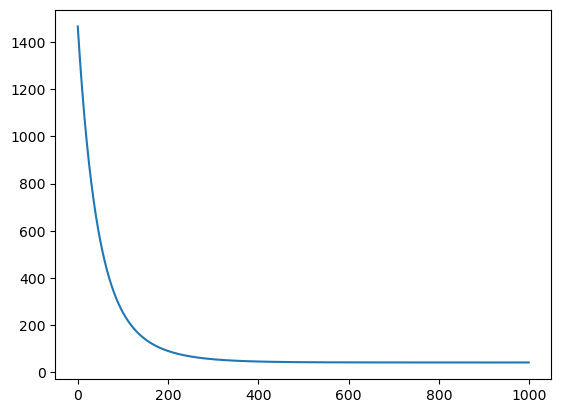

In [96]:
plt.plot(range(1000),cost_hist)

This graph shows that our model doesn't need to much iteration to learn how to made good predictions. We could stop at 400 iterations and still having a perfect prediction.

## THE R-COEFFICIENT

In [97]:
def coef_determination(y, pred):
    u = ((y - prediction)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [98]:
coef_determination(y, prediction)

0.9679184407061278

This value shows us the precision of the prediction